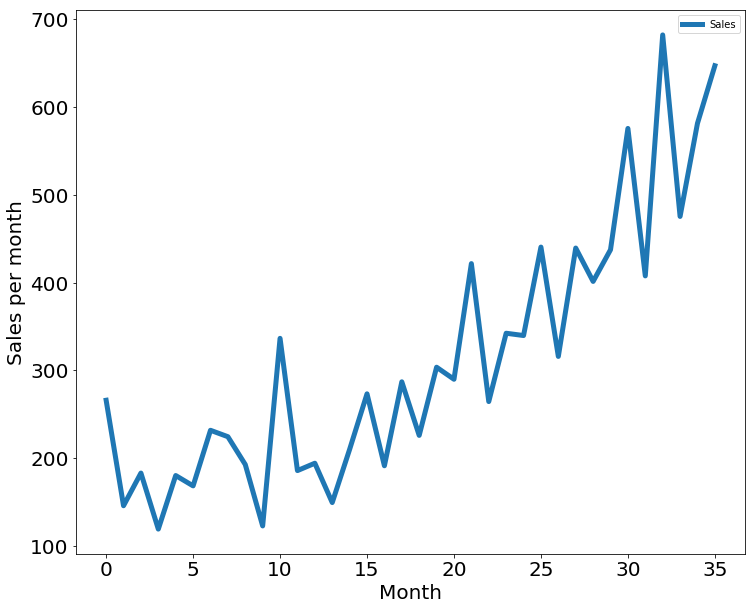

In [26]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# читаем input-файл
df = pd.read_csv('Shampoo.csv')
sales = df[['Sales']]
sales.plot(figsize=(12,10),
linewidth=5, fontsize=20)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Sales per month',
fontsize=20)
plt.show()

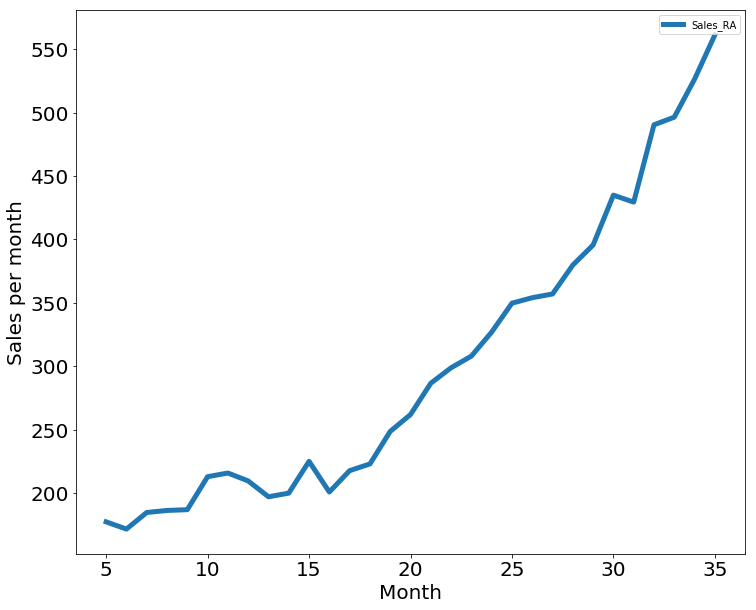

In [28]:
df['Sales_RA'] = df['Sales'].rolling(window=6).mean()
sales_RA = df[['Sales_RA']]
sales_RA.plot(figsize=(12,10),linewidth=5, fontsize=20)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Sales per month',fontsize=20)
plt.show()

Общий тренд - существенный рост ежемесячных продаж шампуня на протяжении последних трех лет

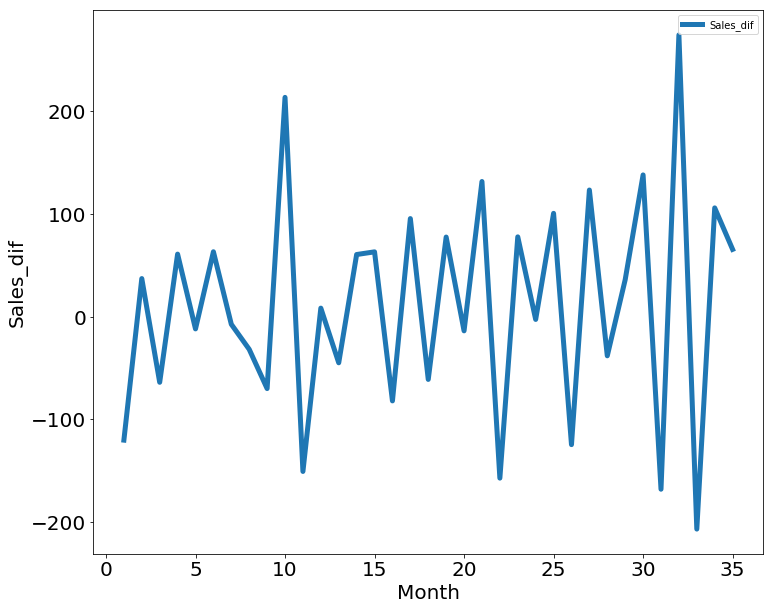

In [32]:
df['Sales_dif'] = df['Sales'].diff()
sales_dif = df[['Sales_dif']]
sales_dif.plot(figsize=(12,10),linewidth=5, fontsize=20)
plt.xlabel('Month', fontsize=20)
plt.ylabel('Sales_dif',fontsize=20)
plt.show()

График разностей однороден на протяжении 3х лет, так что сезонность не наблюдается

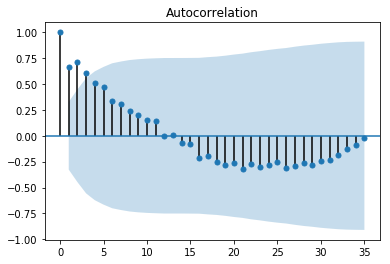

In [37]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df['Sales'])
plt.show()

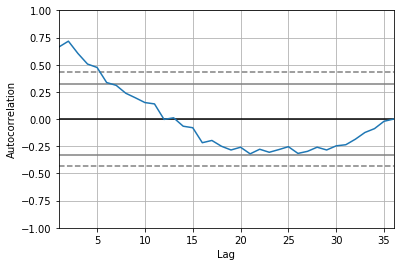

In [38]:
pd.plotting.autocorrelation_plot(df['Sales'])
plt.show()

Как видно из представленных выше графиков, автокорреляция положительна до года (при этом наблюдается снижение корреляции до нуля в течение 12 месяцев), далее на протяжении оставшегося времени корреляция принимает отрицательные значения, достигая плато-минимума на 19 месяце и ее значение возвращается к 0 к 35 месяцу наблюдений.

In [46]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [40]:
size = int(len(df['Sales']) * 0.6)
train_set, test_set = df['Sales'].values[0:size], df['Sales'].values[size:len(sales)]
history = [x for x in train_set]
predictions = list()

In [47]:
for i in range(len(test_set)):
    forecaster=ARIMA(history,order=(5,1,0))
    forecaster_fit=forecaster.fit(disp=0)
    step=forecaster_fit.forecast()
    y=step[0]
    predictions.append(y)
    new=test_set[i]
    history.append(new)
    

C:\Users\alexa\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\alexa\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\alexa\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` 

In [50]:
error = mean_squared_error(test_set, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 7547.805


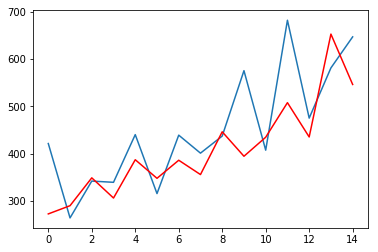

In [52]:
plt.plot(test_set)
plt.plot(predictions, color='red')
plt.show()